In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [18]:
# data = pd.read_csv('training_dataset/training_raw_300mb.csv')
# data = pd.read_csv('training_dataset/raw_scores_pvallog.csv')
# data = pd.read_csv('training_dataset/ionocyte_raw_dataset.csv')
# data = pd.read_csv('training_dataset/ionocyte_scores_pvallog.csv')
data = pd.read_csv('training_dataset/raw_dataset.csv')

In [19]:
# Prepare the feature matrix and target vector
# X = data.drop(['NAME', 'disease_ontology_label', 'group'], axis=1)
data['disease_ontology_label'] = (data['disease_ontology_label'] == 'COVID-19').astype(int)
X = data.drop(['NAME', 'disease_ontology_label'], axis=1)
y = data['disease_ontology_label']

# Display the number of features before feature selection
print(f"Total number of features before selection: {X.shape[1]}")

Total number of features before selection: 2000


In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.00000001, random_state=42)


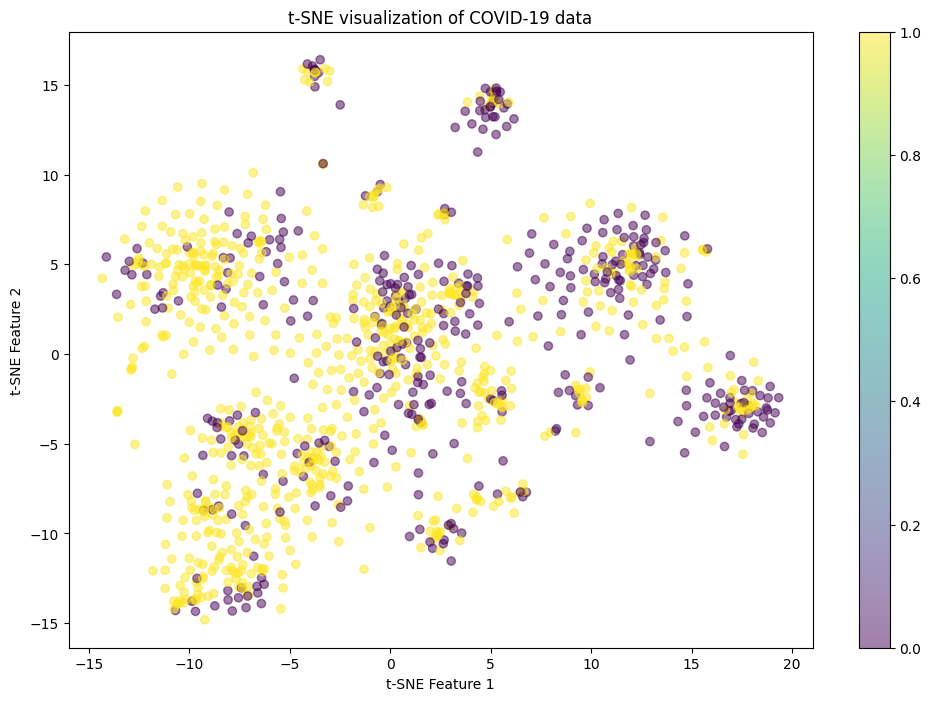

In [21]:
# Applying t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=42)
X = tsne.fit_transform(X)

# Visualize the results of t-SNE
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('t-SNE visualization of COVID-19 data')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()